<a href="https://colab.research.google.com/github/vicksypython/-Demand-Prediction-for-public-transport/blob/main/Copy_of_Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

## 1) LOADING THE DATASET

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/capstone 2/train_revised.csv")
df = dataset.copy()
df.head()
# df = Demand Prediction for public transport

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
df.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


## 2) UNDERSTANDING THE DATA

In [ ]:
df.shape
#There are 51645 observations in the dataset. And has 10 columns.

(51645, 10)

In [ ]:
df.size

516450

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
df.isnull().sum()
#the given dataset is so precise that having no null values 

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [ ]:
df.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


Finding the target variable

Since we are not given the target variable so we need to find target variable first.

The idea to find the target variable 'Number of Tickets' allocated is for each ticket of an individual bus on individual day will be created with the sae 'ride_id'

In [ ]:
# Calculation of Target varible based on the ride id
tmp_no_tickect_df = df.groupby(['ride_id']).seat_number.count().rename('number_of_ticket').reset_index()
tmp_no_tickect_df.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [ ]:
# droping the duplicate value rows with the repeating ride_id
df.drop_duplicates('ride_id', inplace = True)

# Dropping the columns which are not relevant to our target variable
df.drop(['seat_number','payment_method','payment_receipt', 'travel_to'], inplace= True, axis = 1)
df.shape

(6249, 6)

In [ ]:
# Merging the calculated target variable column to the dataset based on the ride_id
df = df.merge(tmp_no_tickect_df, how= 'left', on='ride_id')
# Combaining the date column and time column to get the complete timestamp
df['travel_date_and_time'] = df['travel_date'] + " " + df['travel_time']
df['travel_date_and_time'] = pd.to_datetime(df['travel_date_and_time'])
df.drop(['travel_date', 'travel_time'], inplace= True, axis= 1)
df.head()

,ride_id,travel_from,car_type,max_capacity,number_of_ticket,travel_date_and_time
0,1442,Migori,Bus,49,1,2017-10-17 07:15:00
1,5437,Migori,Bus,49,1,2017-11-19 07:12:00
2,5710,Keroka,Bus,49,1,2017-11-26 07:05:00
3,5777,Homa Bay,Bus,49,5,2017-11-27 07:10:00
4,5778,Migori,Bus,49,31,2017-11-27 07:12:00


##4.Explarotary Data Analysis

Disbribution of number_of_ticket

Text(0.5, 1.0, 'Disbribution of number_of_ticket')

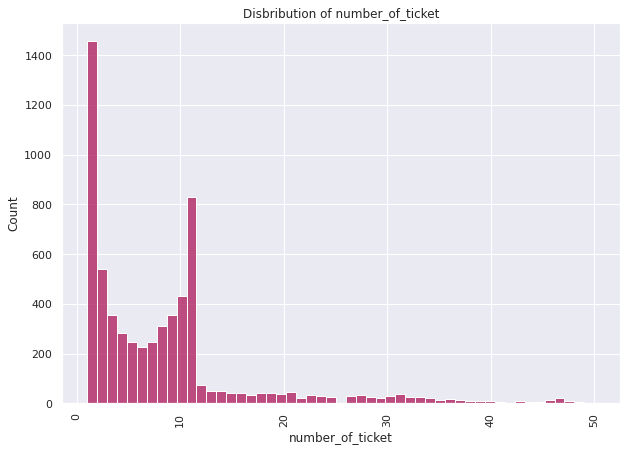

In [ ]:
# Plotting the target variable 'number_of_ticket'
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.histplot(x='number_of_ticket', data=df, color='#ad1759')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
# ax.set_xlabel('travel_from')
# ax.set_ylabel('Frequency')
ax.set_title('Disbribution of number_of_ticket')

Text(0.5, 1.0, 'travel_from counts')

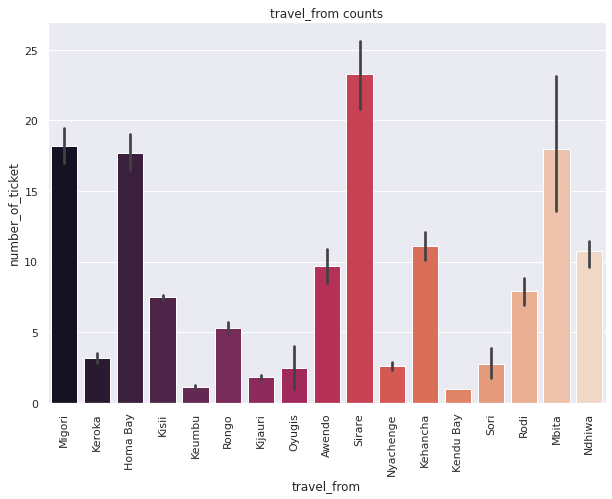

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x="travel_from", y="number_of_ticket", data=df, palette= 'rocket')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
# ax.set_xlabel('travel_from')
# ax.set_ylabel('Frequency')
ax.set_title('travel_from counts')

###Barchart showing maximum capacity from certain places


Text(0.5, 1.0, 'travel_from counts')

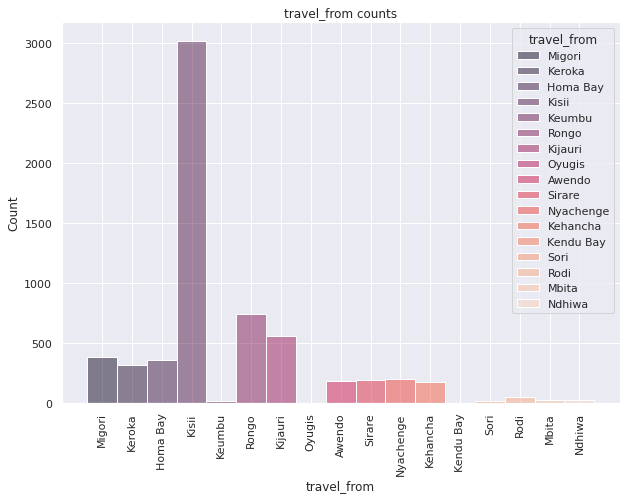

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.histplot(x='travel_from', data=df, hue='travel_from', palette='rocket')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
# ax.set_xlabel('travel_from')
# ax.set_ylabel('Frequency')
ax.set_title('travel_from counts')

###travel_from counts

Text(0.5, 1.0, 'travel_from counts')

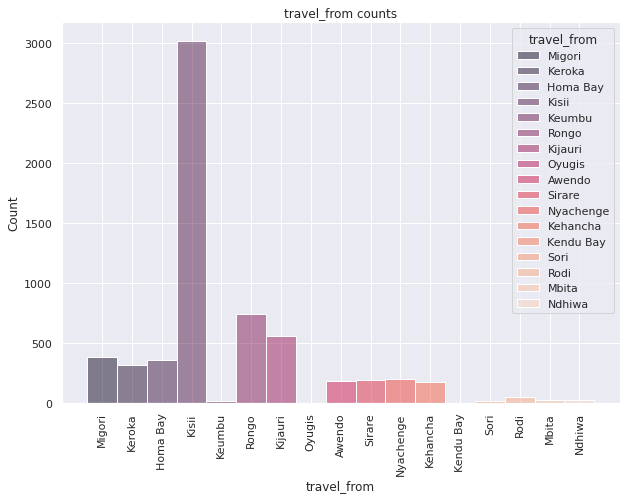

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.histplot(x='travel_from', data=df, hue='travel_from', palette='rocket')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
# ax.set_xlabel('travel_from')
# ax.set_ylabel('Frequency')
ax.set_title('travel_from counts')

Text(0.5, 1.0, 'car_type counts')

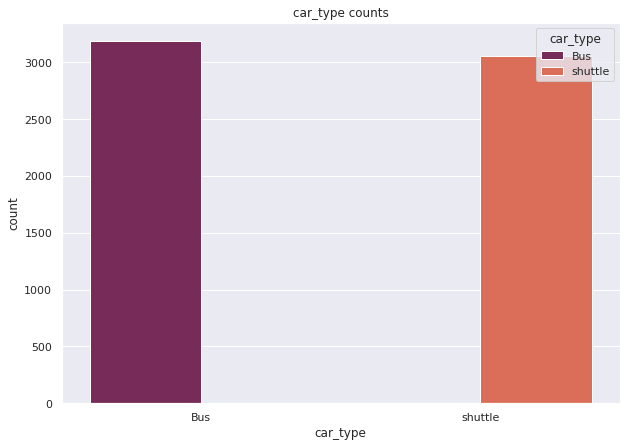

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.countplot(x='car_type', data=df, hue='car_type', palette='rocket')
sns.set_theme(style='darkgrid')
ax.set_xlabel('car_type')
# ax.set_ylabel('Frequency')
ax.set_title('car_type counts')

Text(0.5, 1.0, 'max_capacity counts')

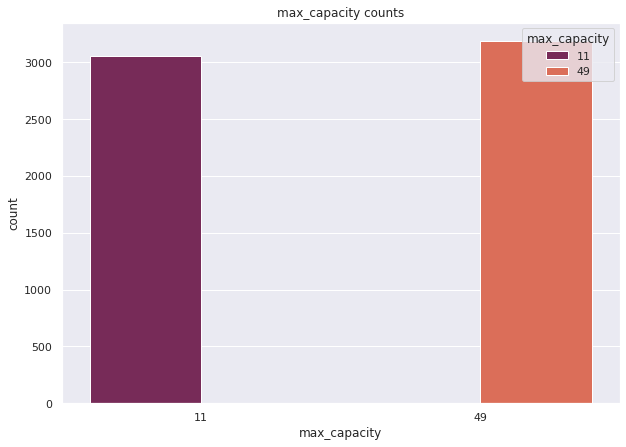

In [ ]:
#maximum_capacity counts
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.countplot(x='max_capacity', data=df, hue='max_capacity', palette='rocket')
sns.set_theme(style='darkgrid')
ax.set_xlabel('max_capacity')
# ax.set_ylabel('Frequency')
ax.set_title('max_capacity counts')

Text(0.5, 1.0, 'travel_from counts')

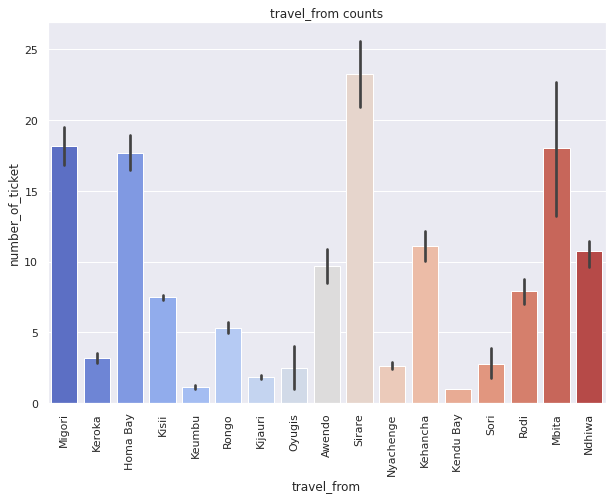

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x="travel_from", y="number_of_ticket", data=df, palette= 'coolwarm')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
# ax.set_xlabel('travel_from')
# ax.set_ylabel('Frequency')
ax.set_title('travel_from counts')

##Feature Engineering##

> Indented block





In [ ]:
# Copying the dataset to a new variable
trans_df = df.copy()

In [ ]:
# Extracting the date and time column to get time based informations
 
trans_df['travel_year']= trans_df['travel_date_and_time'].dt.year
trans_df['travel_month']= trans_df['travel_date_and_time'].dt.month
trans_df['travel_year_quarter']= trans_df['travel_date_and_time'].dt.quarter
trans_df['travel_day_of_year']= trans_df['travel_date_and_time'].dt.dayofyear
trans_df['travel_day_of_month']= trans_df['travel_date_and_time'].dt.day
trans_df['travel_day_of_week']= trans_df['travel_date_and_time'].dt.dayofweek
trans_df['travel_is_in_weekend']= trans_df['travel_day_of_week'].apply(lambda d: 1 if d in [5,6] else 0)
trans_df['travel_hour']= trans_df['travel_date_and_time'].dt.hour
# trans_df['travel_minute']= trans_df['travel_date_and_time'].dt.minute

Text(0.5, 1.0, 'month based travel counts')

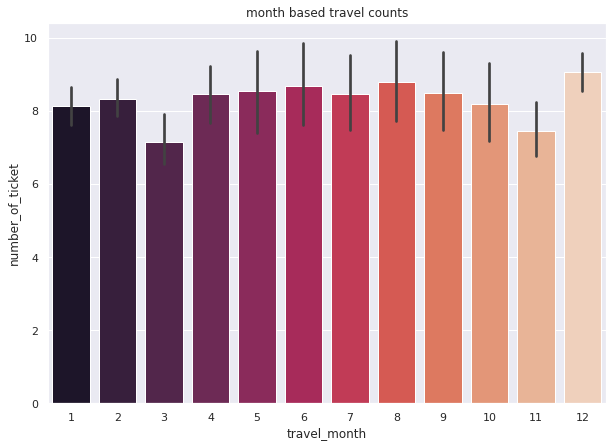

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x="travel_month", y="number_of_ticket", data=trans_df, palette='rocket')
sns.set_theme(style='darkgrid')
ax.set_title('month based travel counts')

Text(0.5, 1.0, 'dates of a month based travel counts')

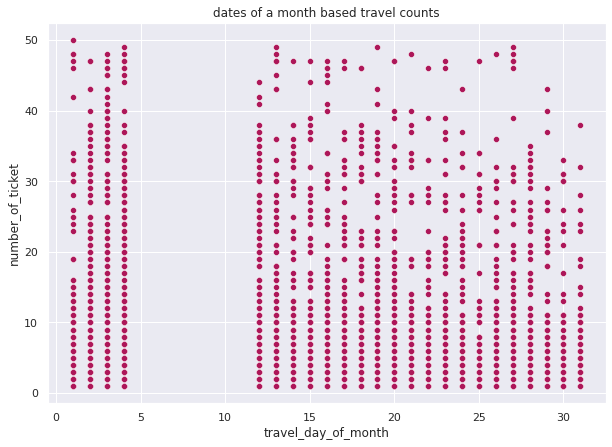

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.scatterplot(x="travel_day_of_month", y="number_of_ticket", data=trans_df, color='#ad1759')
sns.set_theme(style='darkgrid')
ax.set_title('dates of a month based travel counts')

We can see that there is the gap between 5 to 11 in the day of the month. We can assume that there is official holyday of public transport between these days. we can also say that the number of tickets in all the days of month are same.


Text(0.5, 1.0, 'days of a week based travel counts')

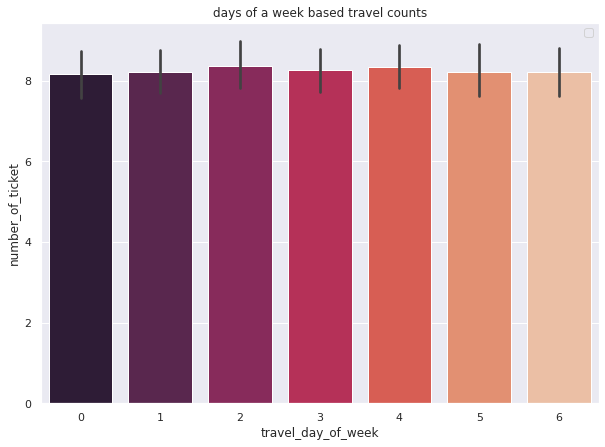

In [ ]:
# days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x="travel_day_of_week", y="number_of_ticket", data=trans_df, palette= 'rocket')
plt.legend( loc='upper right')
sns.set_theme(style='darkgrid')
ax.set_title('days of a week based travel counts')

From the above plot ticket booking are happening in all the 7 days of a week.

Text(0.5, 1.0, 'hour of a day based travel counts')

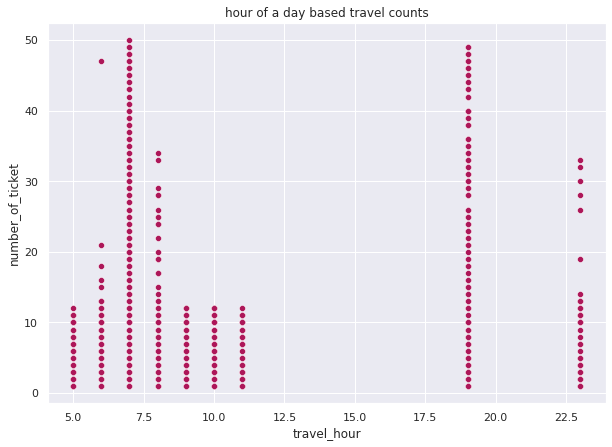

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.scatterplot(x="travel_hour", y="number_of_ticket", data=trans_df, color='#ad1759')
sns.set_theme(style='darkgrid')
ax.set_title('hour of a day based travel counts')

We can see that most of the tickets were sold at 7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

From the above we can say that there is not ride between 12 PM to 5.30 PM

In [ ]:
def time_to_period(h):
  '''This function can take hours as input and return the time period of a day as output'''
  if h >= 7 and h < 11:
    return 'morning'
  elif h >= 11 and h < 15:
    return 'after_noon'
  elif h >= 15 and h < 19:
    return 'evening'
  elif h >= 19 and h <= 24:
    return 'night'
  else:
    return 'early_morning'

In [ ]:
# Calculation of time period based on the travel_date_and_time feature
trans_df['travel_time_period'] = trans_df.travel_hour.apply(time_to_period)
# Creating a seperate column for giving hour wise weights for the hours column
travel_time_period_counts = dict(trans_df.travel_time_period.value_counts())
trans_df['travel_hour_wise_weights'] = np.log1p(trans_df.travel_time_period.map(travel_time_period_counts))
# Creating a seperate column for giving day of a year wise weights for the hours column
travel_day_of_year_counts = dict(trans_df.travel_day_of_year.value_counts())
trans_df['travel_day_of_year_wise_weights'] = np.log1p(trans_df.travel_day_of_year.map(travel_day_of_year_counts))
# Counts of tickets in booked in each dates of a month
trans_df.travel_day_of_month.value_counts()

2     706
12    685
3     659
4     446
1     267
13    249
14    247
16    238
28    228
19    226
18    226
15    213
17    209
20    202
22    192
21    183
27    179
29    177
23    159
24    137
26    120
30    113
25     96
31     92
Name: travel_day_of_month, dtype: int64

In [ ]:
# Giving weights to the each days of the month based on the frequency of ticket bookings
travel_day_of_month_wise_weights_dict = {2:1, 12:1, 3:1, 4:2, 1:3, 13:3, 14:3, 16:3, 28:3, 19:3, 18:3, 15:3, 17:3, 20:3, 22:4, 21:4, 27:4, 29:4, 23:4, 24:4, 26:4, 30:4, 25:4, 31:4}
trans_df['travel_day_of_month_wise_weights'] = trans_df.travel_day_of_month.replace(travel_day_of_month_wise_weights_dict)
# Counts of tickets in booked in each months of year
trans_df.travel_month.value_counts()

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: travel_month, dtype: int64

In [ ]:
# Creating a column for giving weights to the each months of a year based on the frequency of ticket bookings
travel_month_wise_weights_dict = {12: 1,
 2: 1,
 1: 1,
 3: 1,
 4: 1,
 11: 2,
 9: 3,
 7: 3,
 8: 3,
 10: 3,
 6: 3,
 5: 3}
trans_df['travel_month_wise_weights'] = trans_df.travel_month.replace(travel_month_wise_weights_dict)
trans_df.head()

,ride_id,travel_from,car_type,max_capacity,number_of_ticket,travel_date_and_time,travel_year,travel_month,travel_year_quarter,travel_day_of_year,travel_day_of_month,travel_day_of_week,travel_is_in_weekend,travel_hour,travel_time_period,travel_hour_wise_weights,travel_day_of_year_wise_weights,travel_day_of_month_wise_weights,travel_month_wise_weights
0,1442,Migori,Bus,49,1,2017-10-17 07:15:00,2017,10,4,290,17,1,0,7,morning,8.494743,0.693147,3,3
1,5437,Migori,Bus,49,1,2017-11-19 07:12:00,2017,11,4,323,19,6,1,7,morning,8.494743,0.693147,3,2
2,5710,Keroka,Bus,49,1,2017-11-26 07:05:00,2017,11,4,330,26,6,1,7,morning,8.494743,0.693147,4,2
3,5777,Homa Bay,Bus,49,5,2017-11-27 07:10:00,2017,11,4,331,27,0,0,7,morning,8.494743,3.871201,4,2
4,5778,Migori,Bus,49,31,2017-11-27 07:12:00,2017,11,4,331,27,0,0,7,morning,8.494743,3.871201,4,2


In [ ]:
# tmp_df = trans_df.copy()
def calculate_next_and_previous_timings(tmp_df):
  tmp_df.sort_values(['travel_from', 'travel_date_and_time'], inplace= True)
  tmp_df['delay_btw_initial_to_next_and_previous_bus'] = (tmp_df.groupby(['travel_from']).travel_date_and_time.shift(-1) - tmp_df.groupby(['travel_from']).travel_date_and_time.shift(1)).dt.total_seconds()/3600
  tmp_df['delay_btw_1bus_and_next_bus'] = (tmp_df.travel_date_and_time - tmp_df.groupby(['travel_from']).travel_date_and_time.shift(-1)).dt.total_seconds()/3600
  tmp_df['delay_btw_1bus_and_previous_bus'] = (tmp_df.travel_date_and_time - tmp_df.groupby(['travel_from']).travel_date_and_time.shift(1)).dt.total_seconds()/3600
  tmp_df['delay_btw_2bus_and_next_bus'] = (tmp_df.travel_date_and_time - tmp_df.groupby(['travel_from']).travel_date_and_time.shift(-2)).dt.total_seconds()/3600
  tmp_df['delay_btw_2bus_and_previous_bus'] = (tmp_df.travel_date_and_time - tmp_df.groupby(['travel_from']).travel_date_and_time.shift(2)).dt.total_seconds()/3600
  tmp_df['delay_btw_3bus_and_next_bus'] = (tmp_df.travel_date_and_time - tmp_df.groupby(['travel_from']).travel_date_and_time.shift(-3)).dt.total_seconds()/3600
  tmp_df['delay_btw_3bus_and_previous_bus'] = (tmp_df.travel_date_and_time - tmp_df.groupby(['travel_from']).travel_date_and_time.shift(3)).dt.total_seconds()/3600
  new_col = ['delay_btw_initial_to_next_and_previous_bus', 'delay_btw_1bus_and_next_bus', 'delay_btw_1bus_and_previous_bus', 'delay_btw_2bus_and_next_bus', 'delay_btw_2bus_and_previous_bus', 'delay_btw_3bus_and_next_bus','delay_btw_3bus_and_previous_bus']
  tmp_df[new_col] = tmp_df.groupby(['travel_from'])[new_col].fillna(method = 'ffill')
  tmp_df[new_col] = tmp_df.groupby(['travel_from'])[new_col].fillna(method = 'backfill')
  
  return tmp_df
trans_df = calculate_next_and_previous_timings(trans_df)
trans_df.isnull().sum()

ride_id                                       0
travel_from                                   0
car_type                                      0
max_capacity                                  0
number_of_ticket                              0
travel_date_and_time                          0
travel_year                                   0
travel_month                                  0
travel_year_quarter                           0
travel_day_of_year                            0
travel_day_of_month                           0
travel_day_of_week                            0
travel_is_in_weekend                          0
travel_hour                                   0
travel_time_period                            0
travel_hour_wise_weights                      0
travel_day_of_year_wise_weights               0
travel_day_of_month_wise_weights              0
travel_month_wise_weights                     0
delay_btw_initial_to_next_and_previous_bus    3
delay_btw_1bus_and_next_bus             

In [ ]:
trans_df.dropna(inplace= True)
trans_df.shape

(6246, 26)

In [ ]:
trans_df.head()

,ride_id,travel_from,car_type,max_capacity,number_of_ticket,travel_date_and_time,travel_year,travel_month,travel_year_quarter,travel_day_of_year,...,travel_day_of_year_wise_weights,travel_day_of_month_wise_weights,travel_month_wise_weights,delay_btw_initial_to_next_and_previous_bus,delay_btw_1bus_and_next_bus,delay_btw_1bus_and_previous_bus,delay_btw_2bus_and_next_bus,delay_btw_2bus_and_previous_bus,delay_btw_3bus_and_next_bus,delay_btw_3bus_and_previous_bus
502,6654,Awendo,Bus,49,2,2017-05-12 07:08:00,2017,5,2,132,...,4.025352,1,3,5688.066667,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333
5530,12926,Awendo,Bus,49,20,2018-01-04 07:08:00,2018,1,1,4,...,3.526361,2,1,5688.066667,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333
5533,12929,Awendo,Bus,49,2,2018-01-04 07:12:00,2018,1,1,4,...,3.526361,2,1,0.083333,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333
5539,12935,Awendo,Bus,49,9,2018-01-04 07:13:00,2018,1,1,4,...,3.526361,2,1,0.800000,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333
5528,12924,Awendo,Bus,49,15,2018-01-04 08:00:00,2018,1,1,4,...,3.526361,2,1,215.916667,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667


In [ ]:
travel_distance_to_Nairobi_dict = {'Awendo':352, 'Homa Bay':368, 'Kehancha':308, 'Kendu Bay':343, 'Keroka':281, 'Keumbu':295,
                                   'Kijauri':272, 'Kisii':306, 'Mbita':406, 'Migori':373, 'Ndhiwa':385, 'Nyachenge':313, 'Oyugis':324, 
                                   'Rodi':348, 'Rongo':333, 'Sirare':415, 'Sori':407}
trans_df['travel_distance_to_Nairobi'] = trans_df.travel_from.map(travel_distance_to_Nairobi_dict)

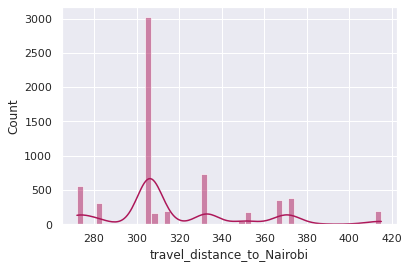

In [ ]:
sns.histplot(x="travel_distance_to_Nairobi", data=trans_df, color='#ad1759', kde=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

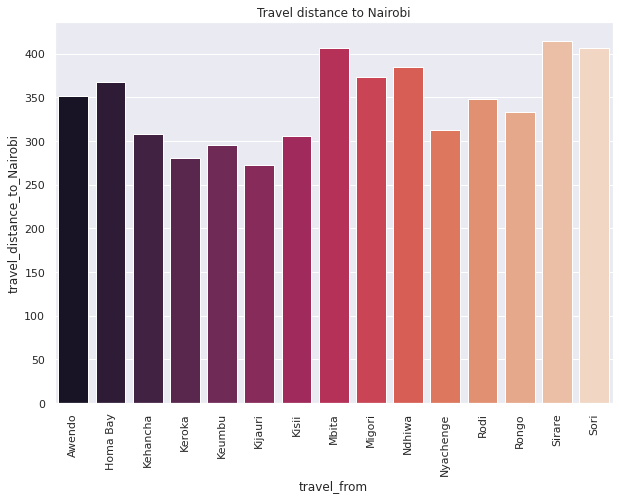

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x='travel_from' ,y="travel_distance_to_Nairobi", data=trans_df, palette= 'rocket')
sns.set_theme(style='darkgrid')
ax.set_title('Travel distance to Nairobi')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Distribution of travel time to Nairobi')

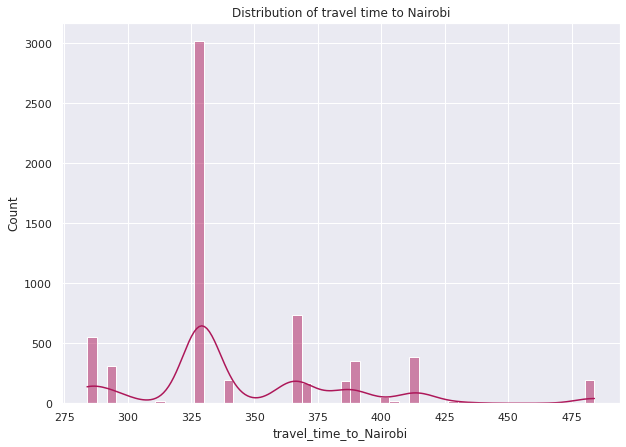

In [ ]:
travel_time_to_Nairobi_dict = {'Awendo': 6*60+24, 'Homa Bay': 6*60+29, 'Kehancha': 6*60+11, 'Kendu Bay': 6*60, 'Keroka': 4*60+55, 'Keumbu': 5*60+13, 'Kijauri': 4*60+44, 
 'Kisii': 5*60+29, 'Mbita': 7*60+8, 'Migori': 6*60+54, 'Ndhiwa': 6*60+47, 'Nyachenge': 5*60+40, 'Oyugis': 5*60+42, 'Rodi': 6*60+40, 'Rongo': 6*60+5, 'Sirare': 8*60+4, 'Sori': 7*60+11}
trans_df['travel_time_to_Nairobi'] = trans_df.travel_from.map(travel_time_to_Nairobi_dict)
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.histplot(x="travel_time_to_Nairobi", data=trans_df, color='#ad1759', kde=True)
sns.set_theme(style='darkgrid')
ax.set_title('Distribution of travel time to Nairobi')

Text(0.5, 1.0, 'Distribution of travel speed to Nairobi')

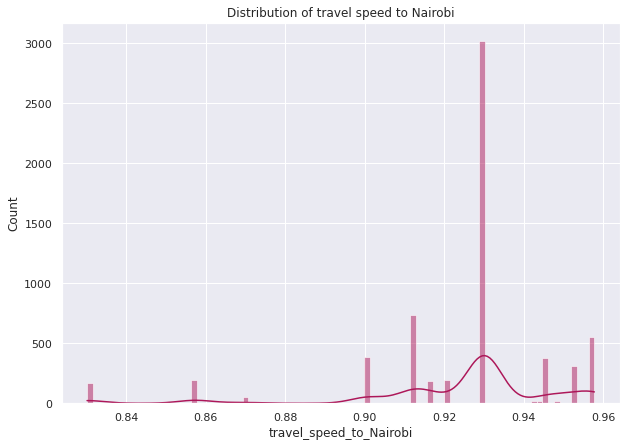

In [ ]:
trans_df['travel_speed_to_Nairobi'] = trans_df.travel_distance_to_Nairobi / trans_df.travel_time_to_Nairobi
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.histplot(x="travel_speed_to_Nairobi", data=trans_df, color='#ad1759', kde=True)
sns.set_theme(style='darkgrid')
ax.set_title('Distribution of travel speed to Nairobi')

In [ ]:
from datetime import timedelta

for key in travel_time_to_Nairobi_dict.keys(): 
    travel_time_to_Nairobi_dict[key]=timedelta( minutes=travel_time_to_Nairobi_dict[key])
travel_time_to_Nairobi_dict

{'Awendo': datetime.timedelta(seconds=23040),
 'Homa Bay': datetime.timedelta(seconds=23340),
 'Kehancha': datetime.timedelta(seconds=22260),
 'Kendu Bay': datetime.timedelta(seconds=21600),
 'Keroka': datetime.timedelta(seconds=17700),
 'Keumbu': datetime.timedelta(seconds=18780),
 'Kijauri': datetime.timedelta(seconds=17040),
 'Kisii': datetime.timedelta(seconds=19740),
 'Mbita': datetime.timedelta(seconds=25680),
 'Migori': datetime.timedelta(seconds=24840),
 'Ndhiwa': datetime.timedelta(seconds=24420),
 'Nyachenge': datetime.timedelta(seconds=20400),
 'Oyugis': datetime.timedelta(seconds=20520),
 'Rodi': datetime.timedelta(seconds=24000),
 'Rongo': datetime.timedelta(seconds=21900),
 'Sirare': datetime.timedelta(seconds=29040),
 'Sori': datetime.timedelta(seconds=25860)}

In [ ]:
trans_df['travel_arrival_data_and_time'] = trans_df.travel_from.map(travel_time_to_Nairobi_dict)
trans_df['travel_arrival_data_and_time'] = trans_df.travel_date_and_time + trans_df['travel_arrival_data_and_time']
trans_df['travel_arrival_hour'] = trans_df.travel_arrival_data_and_time.dt.hour
trans_df['travel_arrival_minute'] = trans_df.travel_arrival_data_and_time.dt.minute
trans_df["travel_is_in_rush_hour"]= trans_df.travel_arrival_hour.apply(lambda h: 1 if (h>=7) and (h<= 17) else 0)

**Handling Categorical Features**

In [ ]:
trans_df.columns

Index(['ride_id', 'travel_from', 'car_type', 'max_capacity',
       'number_of_ticket', 'travel_date_and_time', 'travel_year',
       'travel_month', 'travel_year_quarter', 'travel_day_of_year',
       'travel_day_of_month', 'travel_day_of_week', 'travel_is_in_weekend',
       'travel_hour', 'travel_time_period', 'travel_hour_wise_weights',
       'travel_day_of_year_wise_weights', 'travel_day_of_month_wise_weights',
       'travel_month_wise_weights',
       'delay_btw_initial_to_next_and_previous_bus',
       'delay_btw_1bus_and_next_bus', 'delay_btw_1bus_and_previous_bus',
       'delay_btw_2bus_and_next_bus', 'delay_btw_2bus_and_previous_bus',
       'delay_btw_3bus_and_next_bus', 'delay_btw_3bus_and_previous_bus',
       'travel_distance_to_Nairobi', 'travel_time_to_Nairobi',
       'travel_speed_to_Nairobi', 'travel_arrival_data_and_time',
       'travel_arrival_hour', 'travel_arrival_minute',
       'travel_is_in_rush_hour'],
      dtype='object')

In [ ]:
cat_features = ['travel_from','travel_day_of_month_wise_weights','travel_month_wise_weights']
trans_df = pd.get_dummies(trans_df, columns=cat_features)
label_enc = {'Bus':1, 'shuttle':0}
trans_df.car_type.replace(label_enc, inplace= True)
trans_df.head()

,ride_id,car_type,max_capacity,number_of_ticket,travel_date_and_time,travel_year,travel_month,travel_year_quarter,travel_day_of_year,travel_day_of_month,...,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,travel_day_of_month_wise_weights_1,travel_day_of_month_wise_weights_2,travel_day_of_month_wise_weights_3,travel_day_of_month_wise_weights_4,travel_month_wise_weights_1,travel_month_wise_weights_2,travel_month_wise_weights_3
502,6654,1,49,2,2017-05-12 07:08:00,2017,5,2,132,12,...,0,0,0,1,0,0,0,0,0,1
5530,12926,1,49,20,2018-01-04 07:08:00,2018,1,1,4,4,...,0,0,0,0,1,0,0,1,0,0
5533,12929,1,49,2,2018-01-04 07:12:00,2018,1,1,4,4,...,0,0,0,0,1,0,0,1,0,0
5539,12935,1,49,9,2018-01-04 07:13:00,2018,1,1,4,4,...,0,0,0,0,1,0,0,1,0,0
5528,12924,1,49,15,2018-01-04 08:00:00,2018,1,1,4,4,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
trans_df.columns

Index(['ride_id', 'car_type', 'max_capacity', 'number_of_ticket',
       'travel_date_and_time', 'travel_year', 'travel_month',
       'travel_year_quarter', 'travel_day_of_year', 'travel_day_of_month',
       'travel_day_of_week', 'travel_is_in_weekend', 'travel_hour',
       'travel_time_period', 'travel_hour_wise_weights',
       'travel_day_of_year_wise_weights',
       'delay_btw_initial_to_next_and_previous_bus',
       'delay_btw_1bus_and_next_bus', 'delay_btw_1bus_and_previous_bus',
       'delay_btw_2bus_and_next_bus', 'delay_btw_2bus_and_previous_bus',
       'delay_btw_3bus_and_next_bus', 'delay_btw_3bus_and_previous_bus',
       'travel_distance_to_Nairobi', 'travel_time_to_Nairobi',
       'travel_speed_to_Nairobi', 'travel_arrival_data_and_time',
       'travel_arrival_hour', 'travel_arrival_minute',
       'travel_is_in_rush_hour', 'travel_from_Awendo', 'travel_from_Homa Bay',
       'travel_from_Kehancha', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_

In [ ]:
req_columns = ['car_type', 'travel_day_of_week','travel_day_of_year', 'travel_is_in_weekend', 'travel_hour', 'travel_year', 'travel_year_quarter',
       'travel_hour_wise_weights', 'travel_day_of_year_wise_weights',
       'delay_btw_initial_to_next_and_previous_bus',
       'delay_btw_1bus_and_next_bus', 'delay_btw_1bus_and_previous_bus',
       'delay_btw_2bus_and_next_bus', 'delay_btw_2bus_and_previous_bus',
       'delay_btw_3bus_and_next_bus', 'delay_btw_3bus_and_previous_bus',
       'travel_distance_to_Nairobi', 'travel_time_to_Nairobi', 'travel_speed_to_Nairobi', 'travel_arrival_hour', 'travel_is_in_rush_hour', 
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha', 
       'travel_from_Keroka', 'travel_from_Keumbu', 'travel_from_Kijauri', 
       'travel_from_Kisii', 'travel_from_Mbita', 'travel_from_Migori', 
       'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Rodi', 
       'travel_from_Rongo', 'travel_from_Sirare', 'travel_from_Sori',
       'travel_day_of_month_wise_weights_1',
       'travel_day_of_month_wise_weights_2',
       'travel_day_of_month_wise_weights_3',
       'travel_day_of_month_wise_weights_4',
       'travel_month_wise_weights_1', 'travel_month_wise_weights_2', 'travel_month_wise_weights_3',
       'number_of_ticket']
len(req_columns)

44

In [ ]:
transport_df = trans_df[req_columns]
transport_df.head()

,car_type,travel_day_of_week,travel_day_of_year,travel_is_in_weekend,travel_hour,travel_year,travel_year_quarter,travel_hour_wise_weights,travel_day_of_year_wise_weights,delay_btw_initial_to_next_and_previous_bus,...,travel_from_Sirare,travel_from_Sori,travel_day_of_month_wise_weights_1,travel_day_of_month_wise_weights_2,travel_day_of_month_wise_weights_3,travel_day_of_month_wise_weights_4,travel_month_wise_weights_1,travel_month_wise_weights_2,travel_month_wise_weights_3,number_of_ticket
502,1,4,132,0,7,2017,2,8.494743,4.025352,5688.066667,...,0,0,1,0,0,0,0,0,1,2
5530,1,3,4,0,7,2018,1,8.494743,3.526361,5688.066667,...,0,0,0,1,0,0,1,0,0,20
5533,1,3,4,0,7,2018,1,8.494743,3.526361,0.083333,...,0,0,0,1,0,0,1,0,0,2
5539,1,3,4,0,7,2018,1,8.494743,3.526361,0.800000,...,0,0,0,1,0,0,1,0,0,9
5528,1,3,4,0,8,2018,1,8.494743,3.526361,215.916667,...,0,0,0,1,0,0,1,0,0,15


Text(0.5, 1.0, 'Public Transport dataset correlation table')

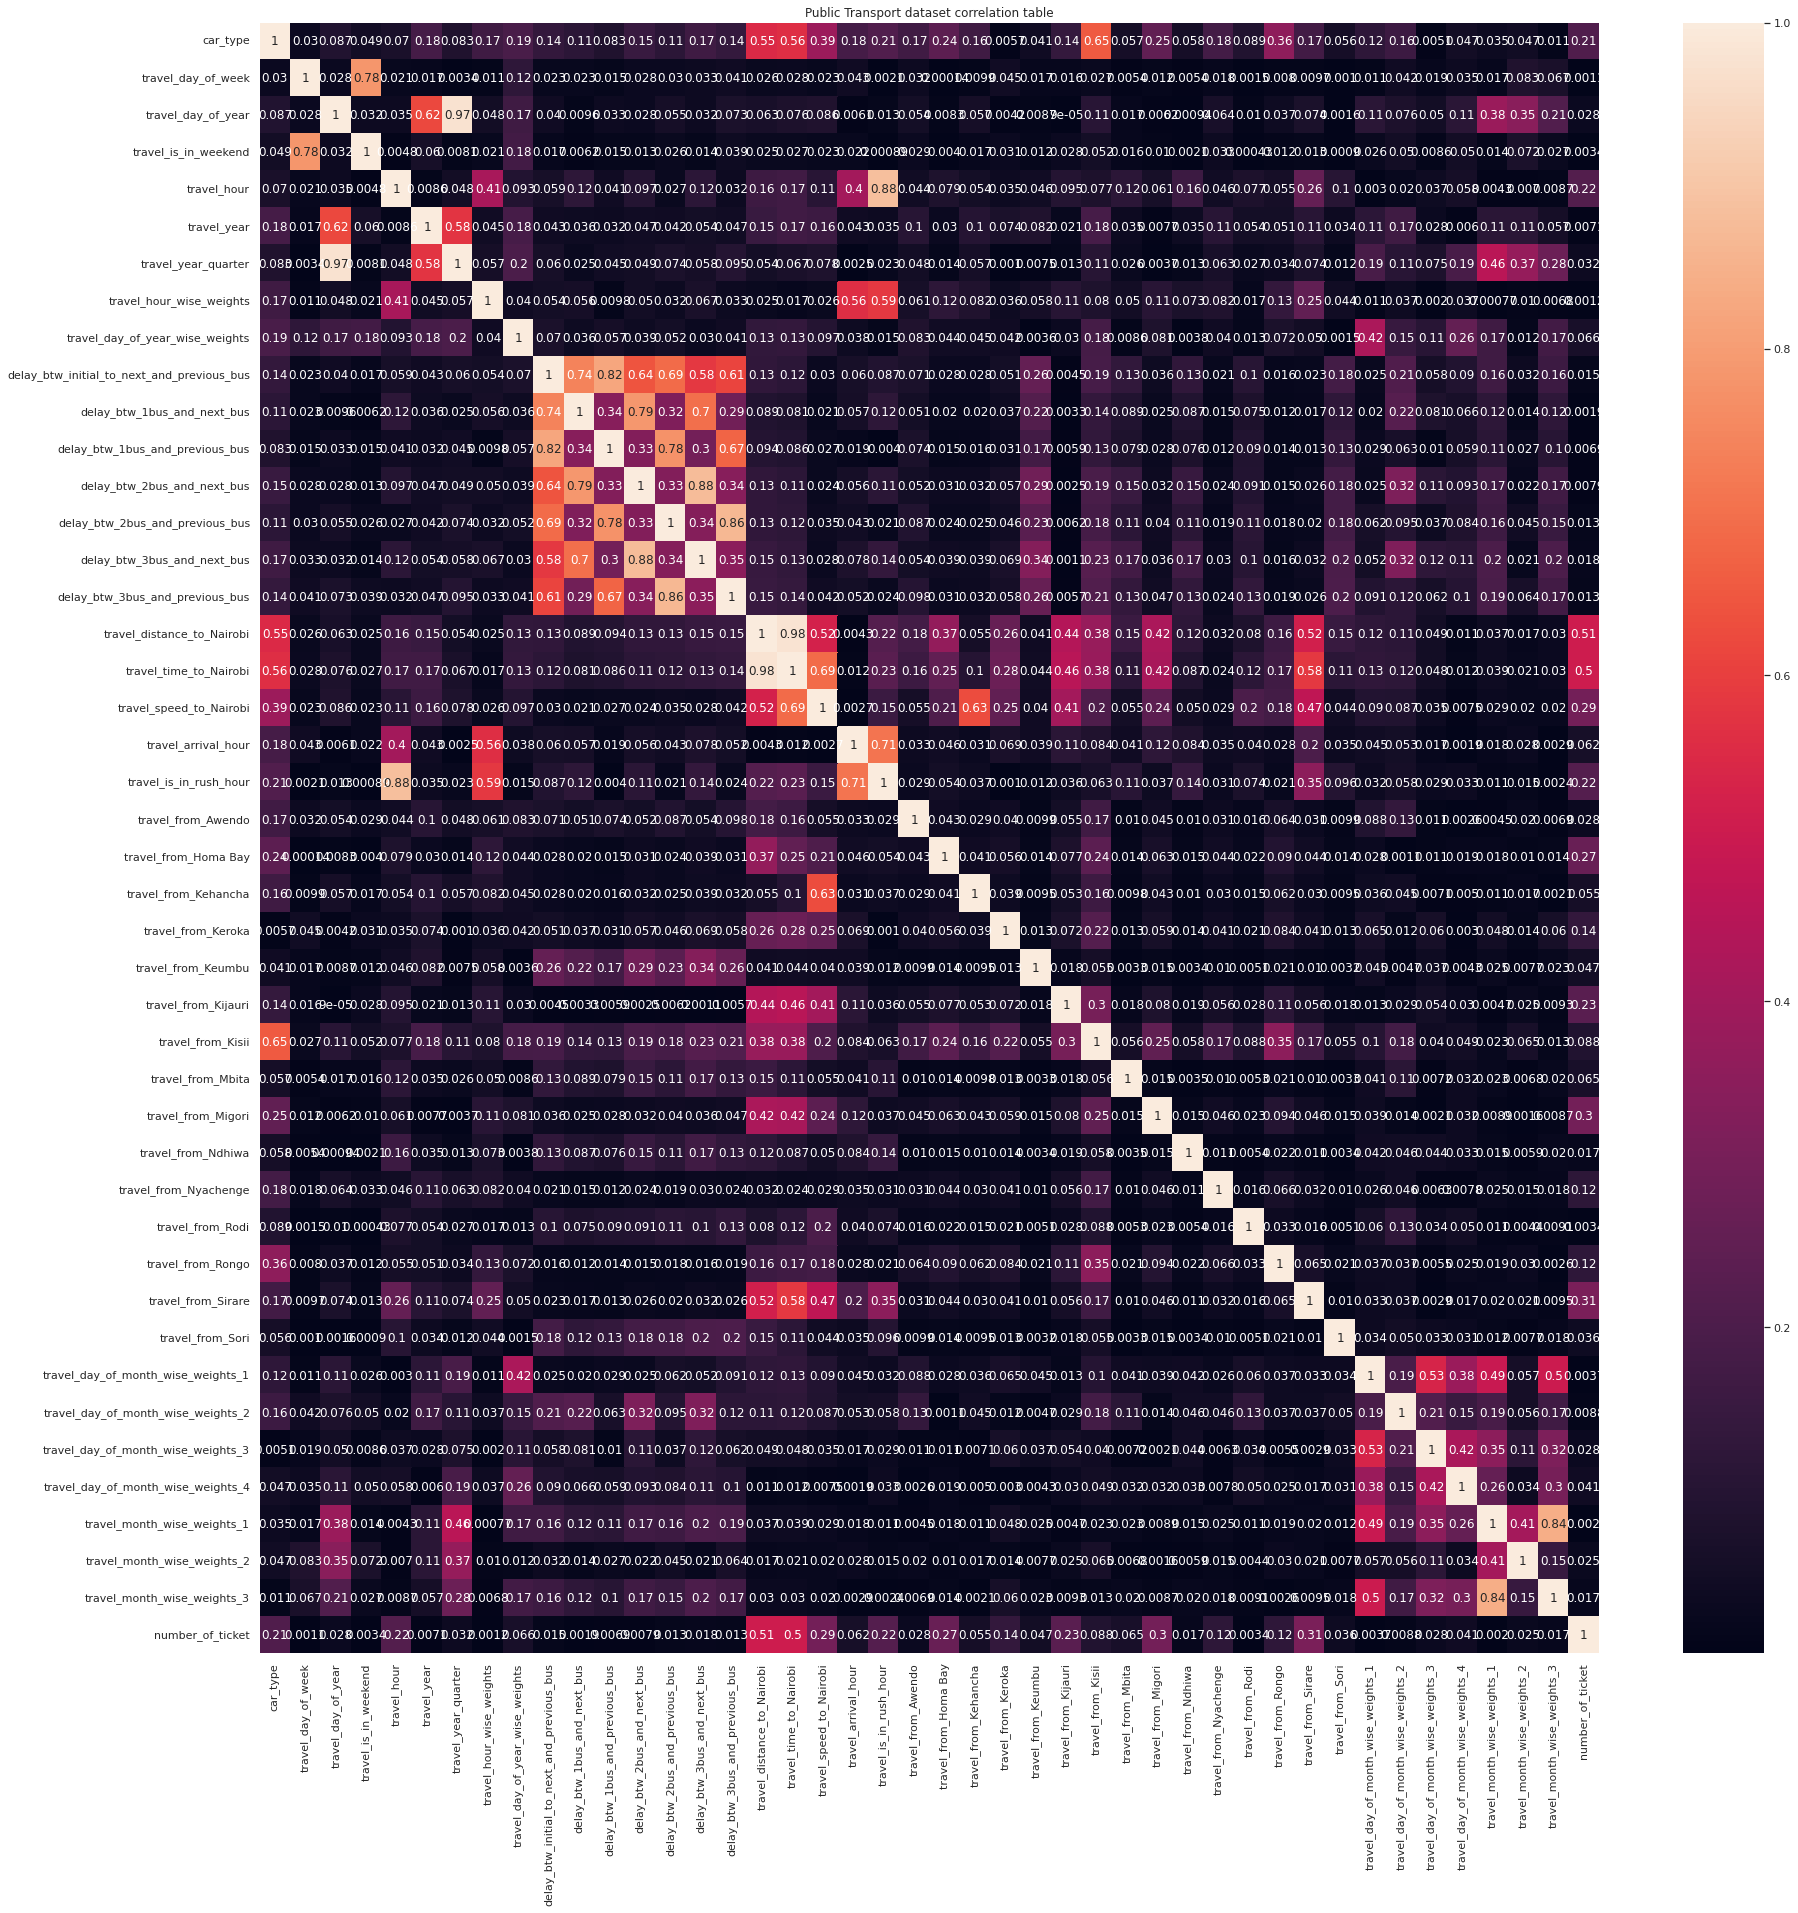

In [ ]:
transport_df_corr = transport_df.corr()
fig = plt.figure(figsize=(30,30))
ax = fig.gca()
sns.heatmap(abs(transport_df_corr), annot=True, cmap='rocket')
plt.title('Public Transport dataset correlation table')

#Training Models

In [ ]:
# Importing the required sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score

In [ ]:
def adjusted_r2(x, r2):
  '''This function will take X variables' dataset and r^2 value as inputs and can return the adjusted r^2 as output'''
  n = len(x)
  p = len(x.columns)
  adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
  return adj_r2

In [ ]:
# Seperating dependent and independent variables of the dataset
X = transport_df.drop(['number_of_ticket'], axis= 1).copy()
y = transport_df['number_of_ticket'].copy()

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (6246, 43)
Shape of y: (6246,)


In [ ]:
# Splitting the dataset for Training and Testing models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 30)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}\n")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4372, 43)
Shape of y_train: (4372,)

Shape of X_test: (1874, 43)
Shape of y_test: (1874,)


#Random Forest Regressor

In [ ]:
# Importing the RandomForest packages
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Training the simple gradient Boosting model
randf_reg = RandomForestRegressor(criterion='squared_error', max_leaf_nodes=10, random_state=30)
randf_reg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, random_state=30)

In [ ]:
# Predicting the values for tarining data
y_train_rf_reg = randf_reg.predict(X_train)
# Sample of predicted values of training data
y_train_rf_reg[:10]

array([10.79116087,  9.14347065,  2.92375443,  8.32640855,  8.29215863,
        8.07519431,  8.32640855,  8.32640855,  7.33912037,  6.60465847])

In [ ]:
# Actual values of test data
y_test[:10]

195      1
1734    11
2046    11
1102     9
3074     8
4841     1
13       1
5177     2
2841     9
1295     1
Name: number_of_ticket, dtype: int64

In [ ]:
# Predicting the values for test data
y_test_rf_reg = randf_reg.predict(X_test)
# Sample of predicted values of test data
y_test_rf_reg[:10]

array([3.15873473, 7.14205524, 8.10944424, 4.25499221, 8.29215863,
       3.86223027, 3.15873473, 4.91434188, 8.29215863, 3.19298466])

In [ ]:
print("Train data Reg Score :",randf_reg.score(X_train,y_train))
print("Test data Reg Score :",randf_reg.score(X_test,y_test))

Train data Reg Score : 0.5486272601114035
Test data Reg Score : 0.5504728283512274


In [ ]:
# Evaluation metrics for training data
MSE_train_rf_reg  = mean_squared_error(y_train, y_train_rf_reg)
print("MSE for Train data :" , MSE_train_rf_reg)

RMSE_train_rf_reg = np.sqrt(MSE_train_rf_reg)
print("RMSE for Train data:" ,RMSE_train_rf_reg)

MAE_train_rf_reg = mean_absolute_error(y_train, y_train_rf_reg)
print("MAE for Train data:" ,MAE_train_rf_reg)

MAPE_train_rf_reg = mean_absolute_percentage_error(y_train, y_train_rf_reg)
print("MAPE for Train data:" ,MAPE_train_rf_reg)

r2_score_train_rf_reg = r2_score(y_train, y_train_rf_reg)
print("R2 for Train data:" ,r2_score_train_rf_reg)
print("Adjusted R2 for Train data: " ,adjusted_r2(X_train, r2_score_train_rf_reg))

MSE for Train data : 32.52673643034507
RMSE for Train data: 5.703221583486395
MAE for Train data: 3.9229715555222877
MAPE for Train data: 1.317896903971226
R2 for Train data: 0.5486272601114035
Adjusted R2 for Train data:  0.5441427342760963


In [ ]:
# Evaluation metrics for test data
MSE_test_rf_reg  = mean_squared_error(y_test, y_test_rf_reg)
print("MSE for Test data :" , MSE_test_rf_reg)

RMSE_test_rf_reg = np.sqrt(MSE_test_rf_reg)
print("RMSE for Test data:" ,RMSE_test_rf_reg)

MAE_test_rf_reg = mean_absolute_error(y_test, y_test_rf_reg)
print("MAE for Test data:" ,MAE_test_rf_reg)

MAPE_test_rf_reg = mean_absolute_percentage_error(y_test, y_test_rf_reg)
print("MAPE for Test data:" ,MAPE_test_rf_reg)

r2_score_test_rf_reg = r2_score(y_test, y_test_rf_reg)
print("R2 for Test data:" ,r2_score_test_rf_reg)
print("Adjusted R2 for Test data: " ,adjusted_r2(X_test, r2_score_test_rf_reg))

MSE for Test data : 36.094161848025806
RMSE for Test data: 6.007841696318721
MAE for Test data: 4.014379353669395
MAPE for Test data: 1.3672618961716088
R2 for Test data: 0.5504728283512274
Adjusted R2 for Test data:  0.5399101680337972


In [ ]:
# Accuracy of the model for training data
train_accuracy_rf_reg = cross_val_score(randf_reg, X_train,y_train, cv=5 )
print(f"Train_data_accuracy: {train_accuracy_rf_reg}")

Train_data_accuracy: [0.54267    0.50120944 0.50893877 0.53743592 0.52800188]


In [ ]:
# Accuracy of the model for test data
test_accuracy_rf_reg = cross_val_score(randf_reg, X_test,y_test, cv=5 )
print(f"Test_data_accuracy: {test_accuracy_rf_reg}")

Test_data_accuracy: [0.36289714 0.56219748 0.56498615 0.48512172 0.53950869]


#Grid Search Cross Validation on Random Forest Regressor

In [ ]:
rfr = RandomForestRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Importing the GridSearch Cross Valiation Packages
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1000, num = 4)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 100, num = 4)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 12]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the parameters grid
grid_params_dict = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(grid_params_dict)

{'bootstrap': [True, False],
 'max_depth': [40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [5, 10, 12],
 'n_estimators': [400, 600, 800, 1000]}


**Gradient Boosting Regressor**

In [ ]:
# Importing the GradientBoosting algorithm
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Training the simple gradient Boosting model
gb_reg = GradientBoostingRegressor(random_state= 30)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=30)

In [ ]:
# Predicting the values for tarining data
y_train_gb_reg = gb_reg.predict(X_train)

In [ ]:
# Sample of predicted values of training data
y_train_gb_reg[:10]

array([18.69056858,  8.61233065,  2.23471894,  9.16776957,  9.010319  ,
        7.77104288,  9.45820269,  9.46805417,  4.64983424,  4.08168883])

In [ ]:
# Actual values of training data
y_train[:10]

1499    40
3626    25
4364     2
1673     9
3419     5
3990     8
1693    10
3654    11
6041     1
5042     1
Name: number_of_ticket, dtype: int64

In [ ]:
# Predicting the values for test data
y_test_gb_reg = gb_reg.predict(X_test)
# Sample of predicted values of test data
y_test_gb_reg[:10]

array([1.80963713, 6.24291014, 7.50881054, 5.02428985, 9.33986832,
       3.98533606, 2.06012039, 3.07382041, 8.98447955, 2.22017483])

In [ ]:
# Actual values of test data
y_test[:10]

195      1
1734    11
2046    11
1102     9
3074     8
4841     1
13       1
5177     2
2841     9
1295     1
Name: number_of_ticket, dtype: int64

In [ ]:
print("Train data Reg Score :",gb_reg.score(X_train,y_train))
print("Test data Reg Score :",gb_reg.score(X_test,y_test))

Train data Reg Score : 0.6587820457757506
Test data Reg Score : 0.6032588814354305


In [ ]:
# Evaluation metrics for training data
MSE_train_gb_reg  = mean_squared_error(y_train, y_train_gb_reg)
print("MSE for Train data :" , MSE_train_gb_reg)

RMSE_train_gb_reg = np.sqrt(MSE_train_gb_reg)
print("RMSE for Train data:" ,RMSE_train_gb_reg)

MAE_train_gb_reg = mean_absolute_error(y_train, y_train_gb_reg)
print("MAE for Train data:" ,MAE_train_gb_reg)

MAPE_train_gb_reg = mean_absolute_percentage_error(y_train, y_train_gb_reg)
print("MAPE for Train data:" ,MAPE_train_gb_reg)

r2_score_train_gb_reg = r2_score(y_train, y_train_gb_reg)
print("R2 for Train data:" ,r2_score_train_gb_reg)
print("Adjusted R2 for Train data: " ,adjusted_r2(X_train, r2_score_train_gb_reg))

MSE for Train data : 24.588783241746025
RMSE for Train data: 4.958707819759703
MAE for Train data: 3.3257056275980026
MAPE for Train data: 1.0577383846147335
R2 for Train data: 0.6587820457757506
Adjusted R2 for Train data:  0.6553919413322102


In [ ]:
# Evaluation metrics for test data
MSE_test_gb_reg  = mean_squared_error(y_test, y_test_gb_reg)
print("MSE for Test data :" , MSE_test_gb_reg)

RMSE_test_gb_reg = np.sqrt(MSE_test_gb_reg)
print("RMSE for Test data:" ,RMSE_test_gb_reg)

MAE_test_gb_reg = mean_absolute_error(y_test, y_test_gb_reg)
print("MAE for Test data:" ,MAE_test_gb_reg)

MAPE_test_gb_reg = mean_absolute_percentage_error(y_test, y_test_gb_reg)
print("MAPE for Test data:" ,MAPE_test_gb_reg)

r2_score_test_gb_reg = r2_score(y_test, y_test_gb_reg)
print("R2 for Test data:" ,r2_score_test_gb_reg)
print("Adjusted R2 for Test data: " ,adjusted_r2(X_test, r2_score_test_gb_reg))

MSE for Test data : 31.85577880134237
RMSE for Test data: 5.644092380652745
MAE for Test data: 3.623099406966969
MAPE for Test data: 1.1649829328488694
R2 for Test data: 0.6032588814354305
Adjusted R2 for Test data:  0.5939365491412903


In [ ]:
# Accuracy of the model for training data
train_accuracy_gb_reg = cross_val_score(gb_reg, X_train,y_train, cv=5 )
print(f"Train_data_accuracy: {train_accuracy_gb_reg}")

Train_data_accuracy: [0.61746274 0.57308481 0.57916916 0.59602605 0.59178997]


In [ ]:
# Accuracy of the model for test data
test_accuracy_gb_reg = cross_val_score(gb_reg, X_test,y_test, cv=5 )
print(f"Test_data_accuracy: {test_accuracy_gb_reg}")

Test_data_accuracy: [0.46246296 0.62730929 0.6024086  0.52436744 0.59556827]


**Grid Search Cross Validation on Gradient Boosting Regressor**

In [ ]:
gbr = GradientBoostingRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gbr.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import GridSearchCV

#Create the parameters grid
#Magnitude of this change in the estimates
learning_rate=  [0.01, 0.05, 0.1, 1, 5]

# Maximum number of levels in tree
max_depth= [4, 6, 8, 10]

# Number of trees in random forest
n_estimators= [20, 30, 50, 60, 70]

#Fraction of observations to be selected for each tree
subsample= [0.1, 0.3, 0.5, 0.6, 0.7, 0.9, 1]

gb_grid_params_dict = {'learning_rate': learning_rate,
         'max_depth': max_depth,
         'n_estimators': n_estimators,
         'subsample': subsample}
pprint(gb_grid_params_dict)

{'learning_rate': [0.01, 0.05, 0.1, 1, 5],
 'max_depth': [4, 6, 8, 10],
 'n_estimators': [20, 30, 50, 60, 70],
 'subsample': [0.1, 0.3, 0.5, 0.6, 0.7, 0.9, 1]}


**XGBoost Regressor**

In [ ]:
# Importing Extreme Gradient Boosting
import xgboost as xgb
#Training basic XGBoost model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')
xgb_reg.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror')

In [ ]:
# Predicting the values for training data
y_train_xgb_reg = xgb_reg.predict(X_train)

In [ ]:
# Sample of predicted values for tarining data
y_train_xgb_reg[:10]

array([17.549099 ,  8.480162 ,  2.3570764,  9.089693 ,  8.759306 ,
        7.6008387,  9.496958 ,  9.510549 ,  4.797313 ,  4.256139 ],
      dtype=float32)

In [ ]:
# Actual values of training data
y_train[:10]

1499    40
3626    25
4364     2
1673     9
3419     5
3990     8
1693    10
3654    11
6041     1
5042     1
Name: number_of_ticket, dtype: int64

In [ ]:
# Predicting the values for test data
y_test_xgb_reg = xgb_reg.predict(X_test)

In [ ]:
# Sample of predicted values for test data
y_test_xgb_reg[:10]

array([2.0310416, 6.694198 , 7.2378273, 4.6874986, 9.366119 , 3.5939436,
       2.3274066, 3.3670619, 8.983361 , 2.3377585], dtype=float32)

In [ ]:
# Actual values of test data
y_test[:10]

195      1
1734    11
2046    11
1102     9
3074     8
4841     1
13       1
5177     2
2841     9
1295     1
Name: number_of_ticket, dtype: int64

In [ ]:
print("Train data Reg Score :",xgb_reg.score(X_train,y_train))
print("Test data Reg Score :",xgb_reg.score(X_test,y_test))

Train data Reg Score : 0.6581784855718662
Test data Reg Score : 0.6047015369394231


In [ ]:
# Evaluation metrics for training data
MSE_train_xgb_reg  = mean_squared_error(y_train, y_train_xgb_reg)
print("MSE for Train data :" , MSE_train_xgb_reg)

RMSE_train_xgb_reg = np.sqrt(MSE_train_xgb_reg)
print("RMSE for Train data:" ,RMSE_train_xgb_reg)

MAE_train_xgb_reg = mean_absolute_error(y_train, y_train_xgb_reg)
print("MAE for Train data:" ,MAE_train_xgb_reg)

MAPE_train_xgb_reg = mean_absolute_percentage_error(y_train, y_train_xgb_reg)
print("MAPE for Train data:" ,MAPE_train_xgb_reg)

r2_score_train_xgb_reg = r2_score(y_train, y_train_xgb_reg)
print("R2 for Train data:" ,r2_score_train_xgb_reg)
print("Adjusted R2 for Train data: " ,adjusted_r2(X_train, r2_score_train_xgb_reg))

MSE for Train data : 24.632276882226925
RMSE for Train data: 4.96309146422136
MAE for Train data: 3.327683064299282
MAPE for Train data: 1.0599956082115716
R2 for Train data: 0.6581784855718662
Adjusted R2 for Train data:  0.65478238457362


In [ ]:
# Evaluation metrics for test data
MSE_test_xgb_reg  = mean_squared_error(y_test, y_test_xgb_reg)
print("MSE for Test data :" , MSE_test_xgb_reg)

RMSE_test_xgb_reg = np.sqrt(MSE_test_xgb_reg)
print("RMSE for Test data:" ,RMSE_test_xgb_reg)

MAE_test_xgb_reg = mean_absolute_error(y_test, y_test_xgb_reg)
print("MAE for Test data:" ,MAE_test_xgb_reg)

MAPE_test_xgb_reg = mean_absolute_percentage_error(y_test, y_test_xgb_reg)
print("MAPE for Test data:" ,MAPE_test_xgb_reg)

r2_score_test_xgb_reg = r2_score(y_test, y_test_xgb_reg)
print("R2 for Test data:" ,r2_score_test_xgb_reg)
print("Adjusted R2 for Test data: " ,adjusted_r2(X_test, r2_score_test_xgb_reg))

MSE for Test data : 31.739942775099372
RMSE for Test data: 5.633821329710357
MAE for Test data: 3.630717263420847
MAPE for Test data: 1.1719818996582392
R2 for Test data: 0.6047015369394231
Adjusted R2 for Test data:  0.595413103107945


In [ ]:
# Accuarcy of the model for training data
train_accuracy_xgb_reg = cross_val_score(xgb_reg, X_train,y_train, cv=5 )
print(f"Train_data_accuracy: {train_accuracy_xgb_reg}")

Train_data_accuracy: [0.61307963 0.58127359 0.58659947 0.59515322 0.59345544]


In [ ]:
# Accuarcy of the model for test data
test_accuracy_xgb_reg = cross_val_score(xgb_reg, X_test,y_test, cv=5 )
print(f"Test_data_accuracy: {test_accuracy_xgb_reg}")

Test_data_accuracy: [0.47215886 0.61233007 0.59619616 0.52258952 0.59788613]


**GridSearch Cross Validation on XGBoost Regressor**

In [ ]:
xgbr = xgb.XGBRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(xgbr.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Fraction of columns to be randomly samples for each tree
colsample_bytree= [0.1, 0.3, 0.5, 0.7, 0.9]
eta = [0.0001, 0.0004, 0.001, 0.004]

# Magnitude of this change in the estimates
learning_rate=  [0.01, 0.05, 0.1]

# Maximum number of levels in tree
max_depth= [6, 8, 10, 12]
min_child_weight= [7, 8, 10, 12]

# Number of trees in random forest
n_estimators= [70, 100, 120]

#Fraction of observations to be selected for each tree
subsample= [0.5, 0.7, 0.9, 1]

# Create the random grid
xgb_grid_params_dict = {'colsample_bytree': colsample_bytree,
         'eta': eta,
         'learning_rate': learning_rate,
         'max_depth': max_depth,
         'min_child_weight': min_child_weight,
         'n_estimators': n_estimators,
         'subsample': subsample}
pprint(xgb_grid_params_dict)

{'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
 'eta': [0.0001, 0.0004, 0.001, 0.004],
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [6, 8, 10, 12],
 'min_child_weight': [7, 8, 10, 12],
 'n_estimators': [70, 100, 120],
 'subsample': [0.5, 0.7, 0.9, 1]}


**Conclusion


In this project, we have used three different types of regression-based algorithms like Random Forest Regressor, Gradient Boosting Regressor, and XGBoost Regressor. We have done hyperparameter tuning parameters for them to find the best model to get the best results, and we also found the important features for training the model.
Out of the three different models the hyperparameters tuned XGBoost Regressor algorithm gives the best results with an accuracy of around 86%.**

# **Summary**:-

1 There are total 61 unique seats in this dataset


2 travelers have used 2 types of payment method and most of the people have used Mpesa to pay for their ticket.

3 The record of 149 days out of 2 year is present in this dataset.

4 There are 2 different types of car and most of them are bus

5 There are two type of payment methods people have used to buy the tickets.


6 There are two type of cars Bus and shuttle and the maximum capacity of the bus is 49 while shuttle can contain 11 travelers

7 We can see that most of the ticktes were sold at 7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

8 From the above we can say that there is not ride between 12pm to 5.30Pm

9 We can see that there is the gap between 5 to 11 in the day of the month. We can assume that there is official holyday of public transport between these days. we can also say that the number of tickets in all the days of month are same.

10 We used diffent type of regression algorithms to train our model like, Linear Regression, Regularized linear regression (Ridge and Lasso), GBM,Random Forest Regressor, XGboost regresssor. and Also we tuned the parameters of Random forest regressor and XGboost regressor and also found the important features for training the model. Out of them XGboost with tuned hyperparameters gave the best result.